# Physics-informed neural networks for characterization of metamaterials

In [5]:
from data import gen_data, set_boundaries, simp_sol
from training import learning_rate_schedule, train
from models import create_model
import matplotlib.pyplot as plt
import keras

We first need to set some global values and settings:

In [6]:
plt.close('all')
plt.rcParams['font.family'] = 'Ubuntu Nerd Font'
plt.rcParams['font.size'] = 10


lower_bound = 0.0
upper_bound = 1.0

## Initial Testing

First we try the simplified function:

$u(x) = \dfrac{d^2}{dx^2} u(x)$

With the boundary conditions set to:

$u(0) = 1$ and $u(1) = 0$

The analytical solution for this equation should be:

$u(x) = \dfrac{e^{-x} (e^2-e^{2x})}{e^2-1}$

For learning the Model, first the boundary conditions need to be set as tensors. Then the trainings data needs to be generated and finally, the model needs to be created. 

In this implementation here I check if the model is already trained in 'data'. If this is the case, the training will be suspendend. Otherwise the model will be automatically trained and a graph will be printed of how the loss developed with respect to the number of epochs.

Epoch 100: Loss = 0.0036997157149016857
Epoch 200: Loss = 0.0020509064197540283
Epoch 300: Loss = 0.0011238893494009972
Epoch 400: Loss = 0.0007702122675254941
Epoch 500: Loss = 0.00048491416964679956
Epoch 600: Loss = 0.0004788713122252375
Epoch 700: Loss = 0.0002683388884179294
Epoch 800: Loss = 0.0009570448892191052
Epoch 900: Loss = 0.00014928651216905564
Epoch 1000: Loss = 0.00010585604468360543
Epoch 1100: Loss = 7.969421858433634e-05
Epoch 1200: Loss = 5.589426291408017e-05
Epoch 1300: Loss = 4.0236784116132185e-05
Epoch 1400: Loss = 3.287014624220319e-05
Last Epoch 1417: last Loss = 3.1789339118404314e-05


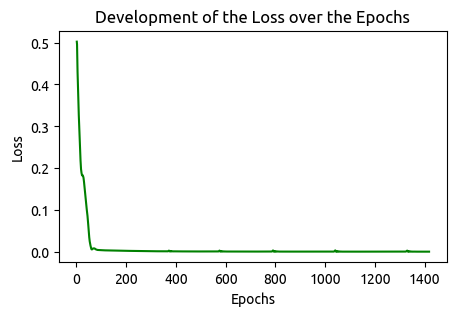

In [7]:
# Set the boundary conditions
x_bc, y_bc = set_boundaries([[0.0], [1.0]], [[1.0], [0.0]])

# create the training data
x_train = gen_data(lower_bound, upper_bound, 100)

# create the model with fixed sizes
model = create_model(3, 50)

# create the learning rate schedule
lr_schedule = learning_rate_schedule(1e-3, 1000, 0.9)

# Train the model if it is not already trained
try:
    model = keras.models.load_model('./data/simp_initial.keras')
except Exception as e:
    error_time = train(model, x_train, x_bc, y_bc, lr_schedule, threshold=1e-8)
    model.save('./data/simp_initial.keras')

    # create a graph showing the loss vs the epochs
    x, y = zip(*error_time)
    plt.figure(figsize=(5, 3))
    plt.plot(x, y, 'g-')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Development of the Loss over the Epochs')
    plt.show()

When the model is finished training, it needs to be tested against the analytical solution. For this, another dataset of test points is created and the analytical solution as well as the PINN are inferenced accorss these points. A graphical comparison is presented below.

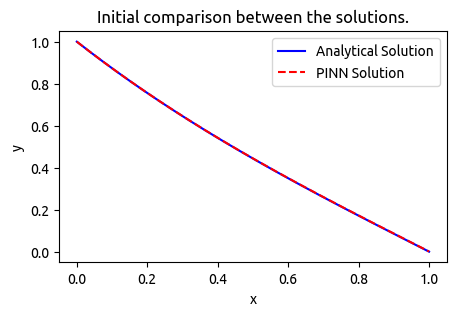

In [8]:
x_test = gen_data(lower_bound, upper_bound, 1000)

y_pred = model(x_test).numpy()
y_true = simp_sol(x_test)

plt.figure(figsize=(5, 3))
plt.plot(x_test, y_true, 'b-', label="Analytical Solution")
plt.plot(x_test, y_pred, 'r--', label='PINN Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Initial comparison between the solutions.')
plt.show()